In [1]:
import pandas as pd

def load_insurance_data():
    url = "https://github.com/neilaxu/schulich_data_science/raw/main/DS2/Final%20Project/Final%20Project%20Dataset.xlsx"
    df = pd.read_excel(url)
    return df

# Load the data
df = load_insurance_data()

In [2]:
def categorize_raclv(df):
    # Calculate mean RACLV
    mean_raclv = df['RACLV'].mean()
    
    # Create conditions for categorization
    conditions = [
        (df['RACLV'] > mean_raclv),
        (df['RACLV'] == 0),
        (df['RACLV'].between(0, mean_raclv))
    ]
    
    # Create category labels
    categories = ['High', 'Low', 'Medium']
    
    # Create new column with categories
    df['RACLV_Category'] = np.select(conditions, categories, default='Medium')
    
    return df

# Add required import
import numpy as np

# Apply categorization
df = categorize_raclv(df)

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_features = ['Age', 'Income Level', 'Education Level', 'Credit Score', 
                     'Driving Record Score', 'Daily Active Calories (kcal)', 
                     'Daily Exercise (min)', 'Daily Steps', 'Stand Hours', 
                     'Workout Duration (min)', 'Resting Heart Rate Index', 
                     'Sleep Quality Index', 'Blood Oxygen Level', 
                     'Blood Pressure Index', 'Cardio Fitness Level']

categorical_features = ['Gender', 'Occupation', 'Policy Type']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

target_map = {'High': 2, 'Medium': 1, 'Low': 0}
y = df['RACLV_Category'].map(target_map)
X = df[numerical_features + categorical_features]
X_transformed = preprocessor.fit_transform(X)

print(f"Transformed X shape: {X_transformed.shape}")
print(f"Target y shape: {y.shape}")

Transformed X shape: (53503, 27)
Target y shape: (53503,)


In [4]:
print(df.columns.tolist())

['ID', 'Age', 'Gender', 'Marital Status', 'Occupation', 'Income Level', 'Education Level', 'Policy Type', 'Credit Score', 'Driving Record Score', 'RACLV', 'Daily Active Calories (kcal)', 'Daily Exercise (min)', 'Daily Steps', 'Stand Hours', 'Workout Duration (min)', 'Resting Heart Rate Index', 'Sleep Quality Index', 'Blood Oxygen Level', 'Blood Pressure Index', 'Cardio Fitness Level', 'RACLV_Category']


In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define feature sets
exercise_features = ['Daily Active Calories (kcal)', 'Daily Exercise (min)', 
                    'Daily Steps', 'Stand Hours', 'Workout Duration (min)']
health_features = ['Resting Heart Rate Index', 'Sleep Quality Index', 
                  'Blood Oxygen Level', 'Blood Pressure Index', 'Cardio Fitness Level']

# Create datasets and standardize
scaler = StandardScaler()
exercise_scaled = scaler.fit_transform(df[exercise_features])
health_scaled = scaler.fit_transform(df[health_features])

# Apply PCA
exercise_pca = PCA(n_components=1)
health_pca = PCA(n_components=1)

# Transform data
exercise_index = exercise_pca.fit_transform(exercise_scaled)
health_index = health_pca.fit_transform(health_scaled)

# Scale to 0-1
df['Exercise_Index'] = (exercise_index - exercise_index.min()) / (exercise_index.max() - exercise_index.min())
df['Health_Index'] = (health_index - health_index.min()) / (health_index.max() - health_index.min())

# Print variance explained
print("Variance explained:")
print(f"Exercise Index: {exercise_pca.explained_variance_ratio_[0]:.3f}")
print(f"Health Index: {health_pca.explained_variance_ratio_[0]:.3f}")

Variance explained:
Exercise Index: 0.638
Health Index: 0.331


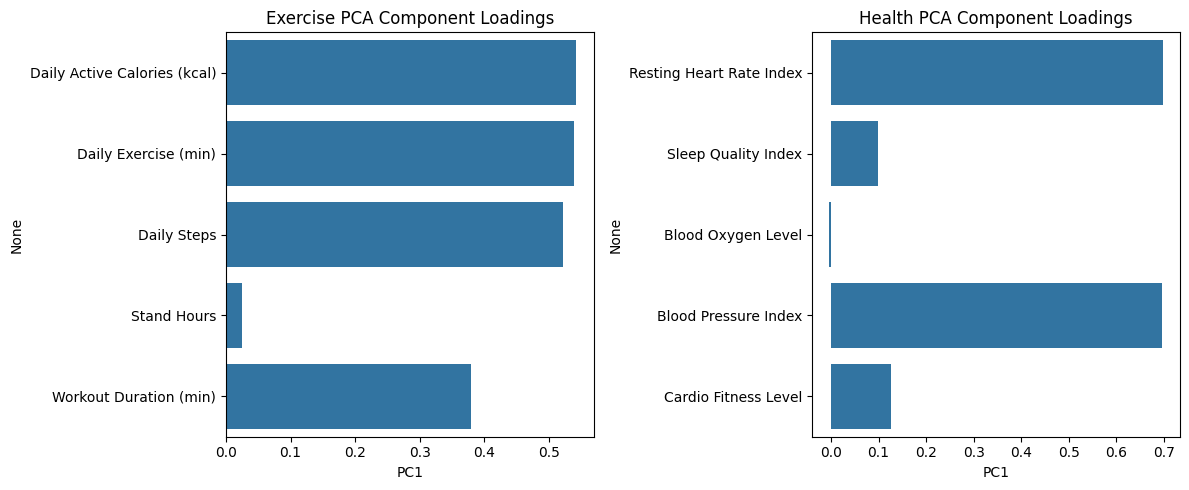

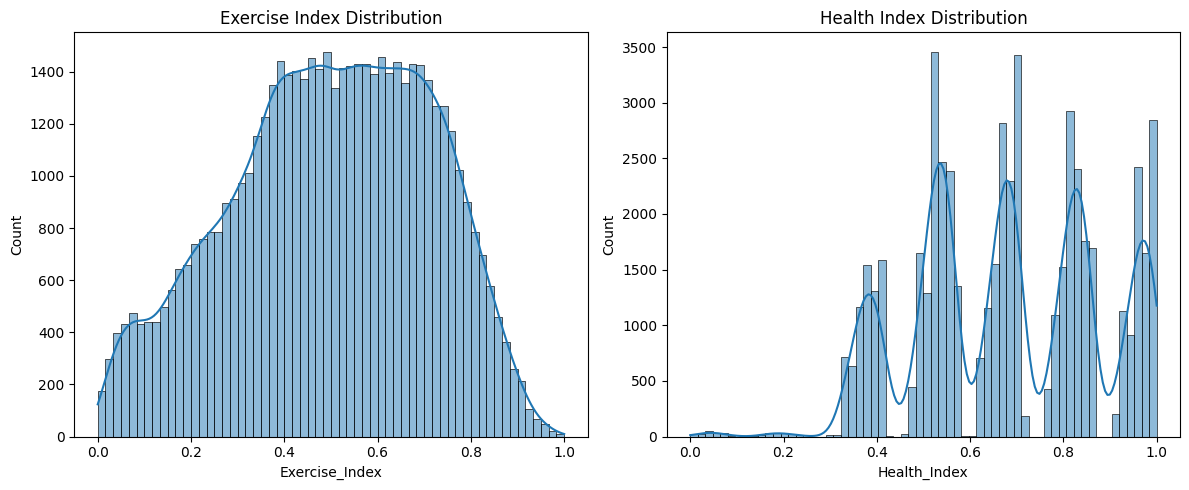

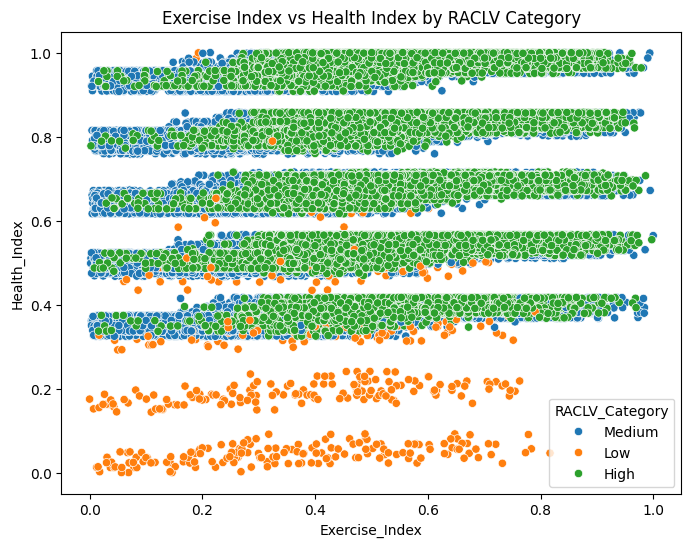

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Component Loadings Plot
plt.figure(figsize=(12, 5))

# Exercise PCA loadings
plt.subplot(1, 2, 1)
exercise_loadings = pd.DataFrame(
    exercise_pca.components_.T,
    columns=['PC1'],
    index=exercise_features
)
sns.barplot(x='PC1', y=exercise_loadings.index, data=exercise_loadings)
plt.title('Exercise PCA Component Loadings')

# Health PCA loadings
plt.subplot(1, 2, 2)
health_loadings = pd.DataFrame(
    health_pca.components_.T,
    columns=['PC1'],
    index=health_features
)
sns.barplot(x='PC1', y=health_loadings.index, data=health_loadings)
plt.title('Health PCA Component Loadings')
plt.tight_layout()
plt.show()

# 2. Index Distribution Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df['Exercise_Index'], kde=True)
plt.title('Exercise Index Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data=df['Health_Index'], kde=True)
plt.title('Health Index Distribution')
plt.tight_layout()
plt.show()

# 3. Indices Relationship Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Exercise_Index', y='Health_Index', hue='RACLV_Category')
plt.title('Exercise Index vs Health Index by RACLV Category')
plt.show()

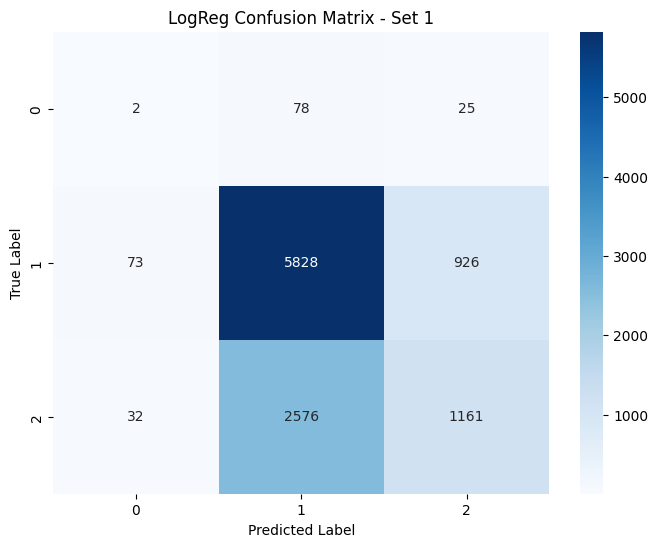

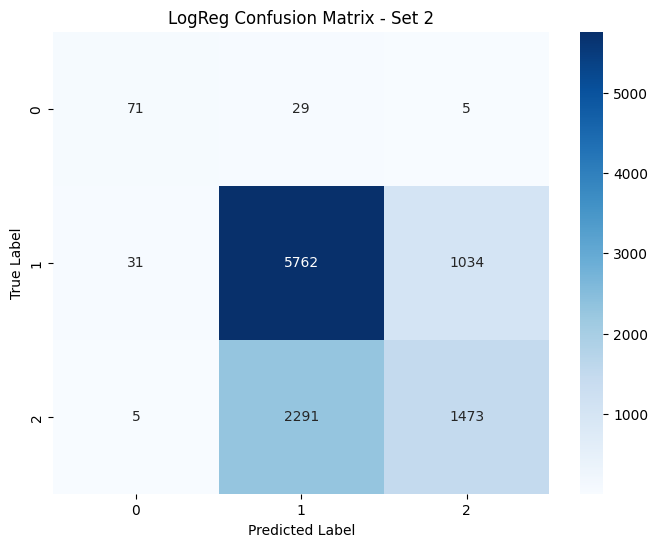

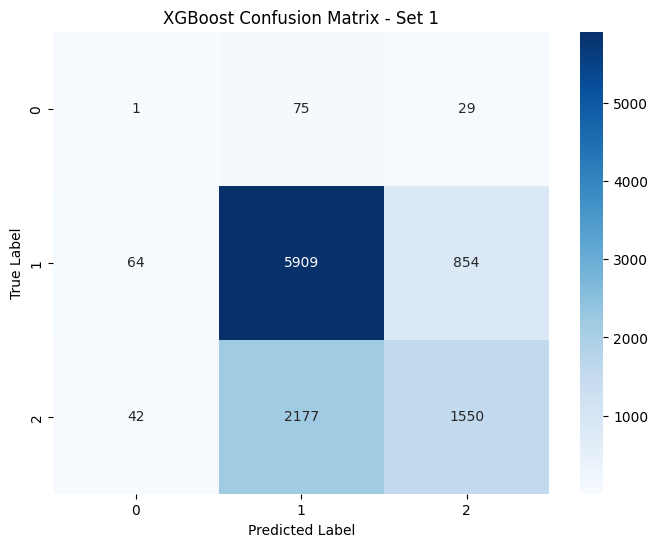

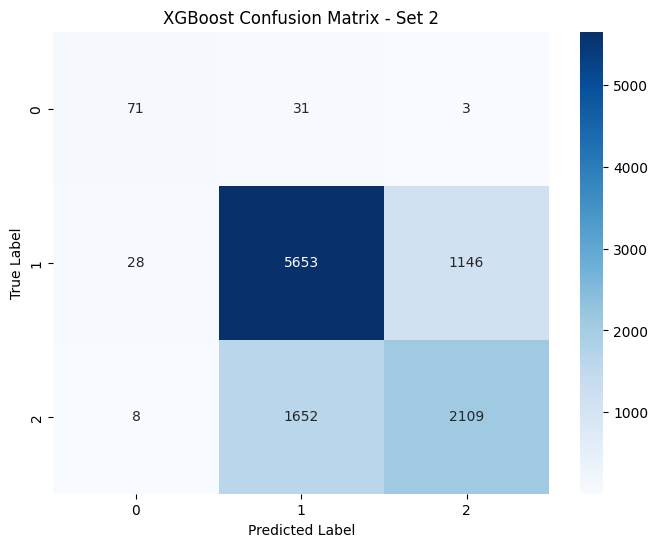

C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 42802, number of used features: 21
[LightGBM] [Info] Start training from score -4.619335
[LightGBM] [Info] Start training from score -0.450798
[LightGBM] [Info] Start training from score -1.041228


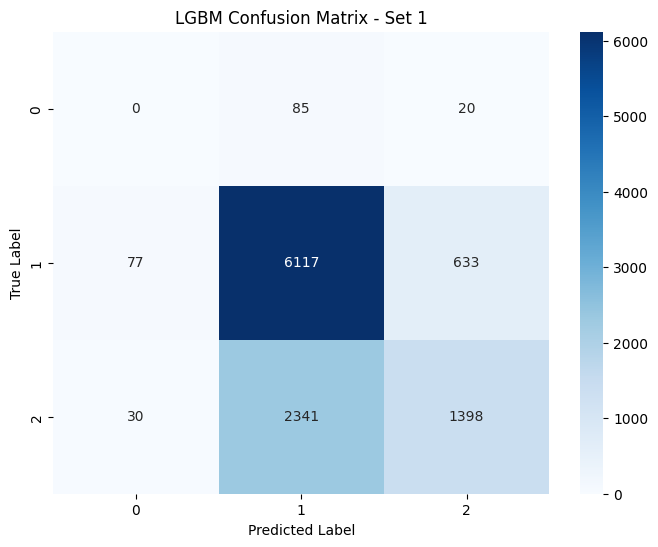

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 42802, number of used features: 23
[LightGBM] [Info] Start training from score -4.619335
[LightGBM] [Info] Start training from score -0.450798
[LightGBM] [Info] Start training from score -1.041228


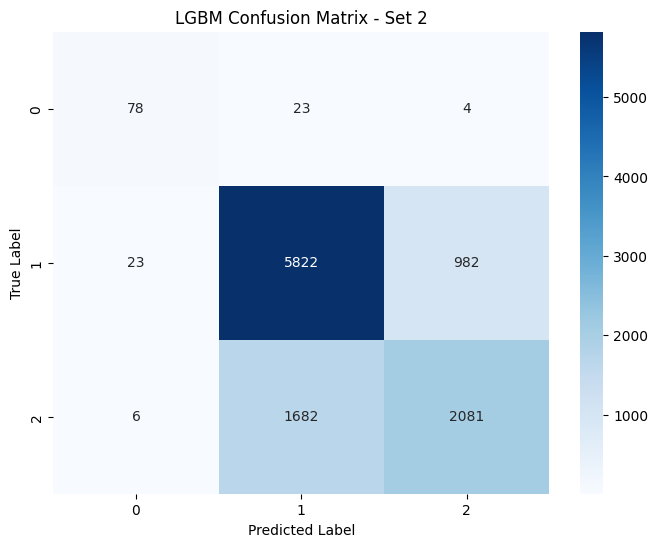


Model Performance Comparison:
           LogReg_Set1  LogReg_Set2  XGBoost_Set1  XGBoost_Set2  LGBM_Set1  \
Accuracy         0.653        0.683         0.697         0.732      0.702   
Precision        0.632        0.668         0.686         0.726      0.697   
Recall           0.653        0.683         0.697         0.732      0.702   
F1               0.625        0.665         0.679         0.727      0.677   
ROC AUC          0.612        0.804         0.667         0.862      0.663   

           LGBM_Set2  
Accuracy       0.746  
Precision      0.740  
Recall         0.746  
F1             0.739  
ROC AUC        0.870  


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import xgboost as xgb
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt

# Define feature sets
numerical_features1 = ['Age', 'Income Level', 'Education Level', 'Credit Score', 'Driving Record Score']
categorical_features1 = ['Gender', 'Marital Status', 'Occupation', 'Policy Type']
numerical_features2 = numerical_features1 + ['Exercise_Index', 'Health_Index']
categorical_features2 = categorical_features1

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])

preprocessor1 = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features1),
    ('cat', categorical_transformer, categorical_features1)
])

preprocessor2 = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features2),
    ('cat', categorical_transformer, categorical_features2)
])

def adjust_predictions(y_pred_proba, target_low_ratio=0.01):
    low_probs = y_pred_proba[:, 0]
    n_samples = len(low_probs)
    n_low = int(n_samples * target_low_ratio)
    low_indices = np.argsort(low_probs)[-n_low:]
    y_pred_adjusted = np.argmax(y_pred_proba, axis=1)
    y_pred_adjusted[low_indices] = 0
    return y_pred_adjusted

def evaluate_and_plot(model, X_train, X_test, y_train, y_test, model_name, set_num):
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred = adjust_predictions(y_pred_proba)
    
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1': f1_score(y_test, y_pred, average='weighted'),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    }
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix - Set {set_num}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    return metrics

# Prepare data
X1 = df[numerical_features1 + categorical_features1]
X2 = df[numerical_features2 + categorical_features2]
y = df['RACLV_Category'].map({'High': 2, 'Medium': 1, 'Low': 0})

# Split data
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
X2_train, X2_test, _, _ = train_test_split(X2, y, test_size=0.2, random_state=42)

# Process data
X1_train_processed = preprocessor1.fit_transform(X1_train)
X1_test_processed = preprocessor1.transform(X1_test)
X2_train_processed = preprocessor2.fit_transform(X2_train)
X2_test_processed = preprocessor2.transform(X2_test)

# Initialize models
models = {
    'LogReg': LogisticRegression(max_iter=1000),
    'XGBoost': xgb.XGBClassifier(),
    'LGBM': lgb.LGBMClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Set 1
    results[f"{name}_Set1"] = evaluate_and_plot(
        model, X1_train_processed, X1_test_processed, 
        y_train, y_test, name, 1
    )
    
    # Set 2
    results[f"{name}_Set2"] = evaluate_and_plot(
        model, X2_train_processed, X2_test_processed, 
        y_train, y_test, name, 2
    )

# Display results
results_df = pd.DataFrame(results).round(3)
print("\nModel Performance Comparison:")
print(results_df)